<a href="https://colab.research.google.com/github/thesuravaram/Data-Analysis-Visualization/blob/main/Lab_2_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab 2-Logistic Regression**
<br>Suravaram Dhanush
<br>251580840034

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
print(f"Shape of data: {df.shape}")
print(f"Data info\n{df.info()}")
print(f"Statistical info\n{df.describe}")

Shape of data: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Data info
None
Statistical info
<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1 

In [ ]:
mean_age = df['Age'].mean()
sd_age = df['Age'].std()

print(f"Mean Age: {mean_age}")
print(f"Standard Deviation Age: {sd_age}")

Mean Age: 33.240885416666664
Standard Deviation Age: 11.76023154067868


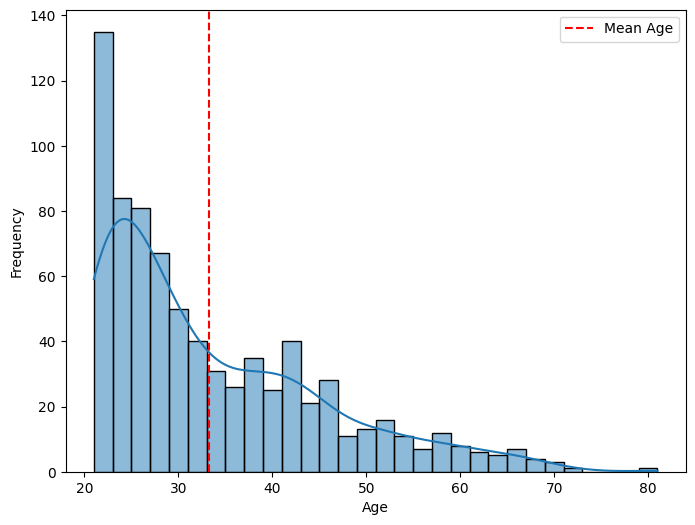

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['Age'],kde=True,bins=30)
plt.axvline(mean_age,color='red',linestyle='--',label='Mean Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
relation = df.groupby('Outcome')[['Age','BMI']].mean().reset_index()
print("Relation of Mean Age and Mean BMI v/s Outcome")
print(relation)

Relation of Mean Age and Mean BMI v/s Outcome
   Outcome        Age        BMI
0        0  31.190000  30.304200
1        1  37.067164  35.142537


/tmp/ipython-input-2727850867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome',y='Age',data=df,palette='Set1')


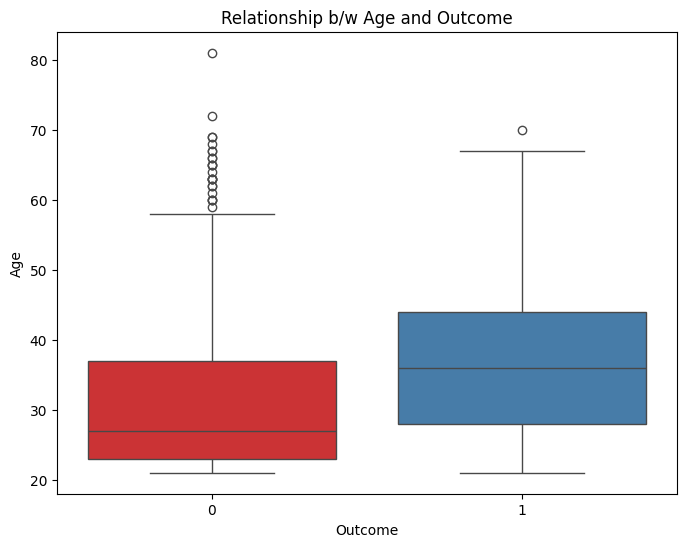

/tmp/ipython-input-2727850867.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome',y='BMI',data=df,palette='Set2')


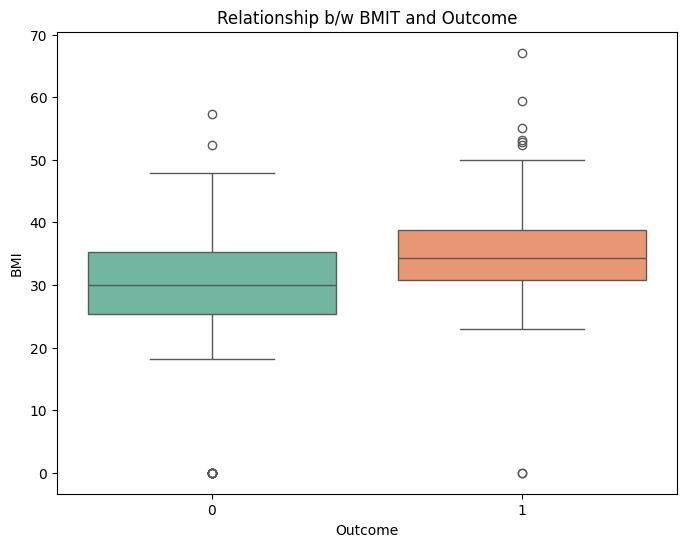

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Outcome',y='Age',data=df,palette='Set1')
plt.title("Relationship b/w Age and Outcome")
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='Outcome',y='BMI',data=df,palette='Set2')
plt.title('Relationship b/w BMIT and Outcome')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.show()

In [ ]:
class_counts = df['Outcome'].value_counts()
class_perentage = class_counts / len(df) *100
print(f"Class Counts\n{class_counts}")
print(f"Class Percentage\n{class_perentage}")

Class Counts
Outcome
0    500
1    268
Name: count, dtype: int64
Class Percentage
Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64


In [ ]:
X=df.drop('Outcome',axis=1)
Y=df['Outcome']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=200)

Confusion Matrix
[[120  31]
 [ 30  50]]


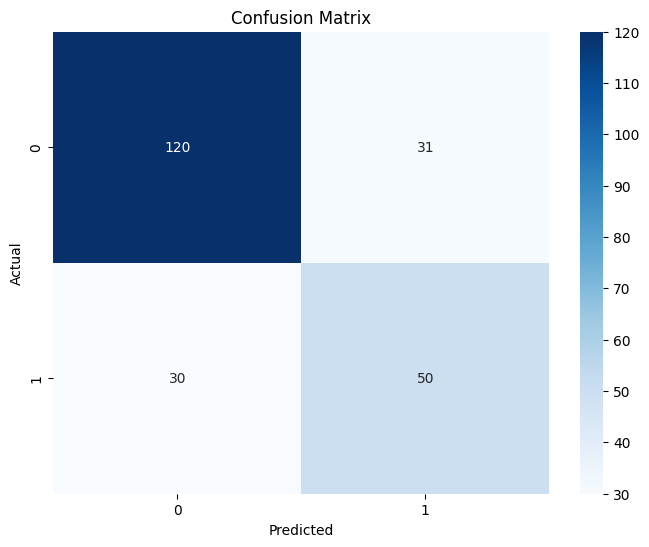

In [ ]:
Y_pred = model.predict(X_test)
Y_prob = model.predict_proba(X_test)[:,1]

cm = confusion_matrix(Y_test,Y_pred)
print(f"Confusion Matrix\n{cm}")
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
tn,fp,fn,tp = cm.ravel()
acc = accuracy_score(Y_test,Y_pred)

tpr = tp / (tp+fn)

tnr = tn / (tn+fp)

print(f"Acuracy: {acc:0.3f}")
print(f"True Positive Rate: {tpr:0.3f}")
print(f"True Negative Rate: {tnr:0.3f}")

Acuracy: 0.736
True Positive Rate: 0.625
True Negative Rate: 0.795


In [ ]:
from sklearn.metrics import roc_curve,auc

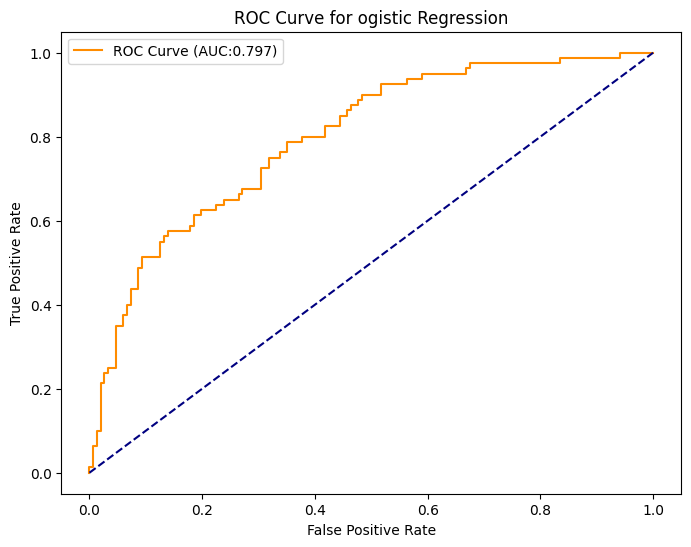

In [ ]:
fpr,tpr,thresholds = roc_curve(Y_test,Y_prob)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',label=f"ROC Curve (AUC:{roc_auc:0.3f})")
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ogistic Regression')
plt.legend()
plt.show()